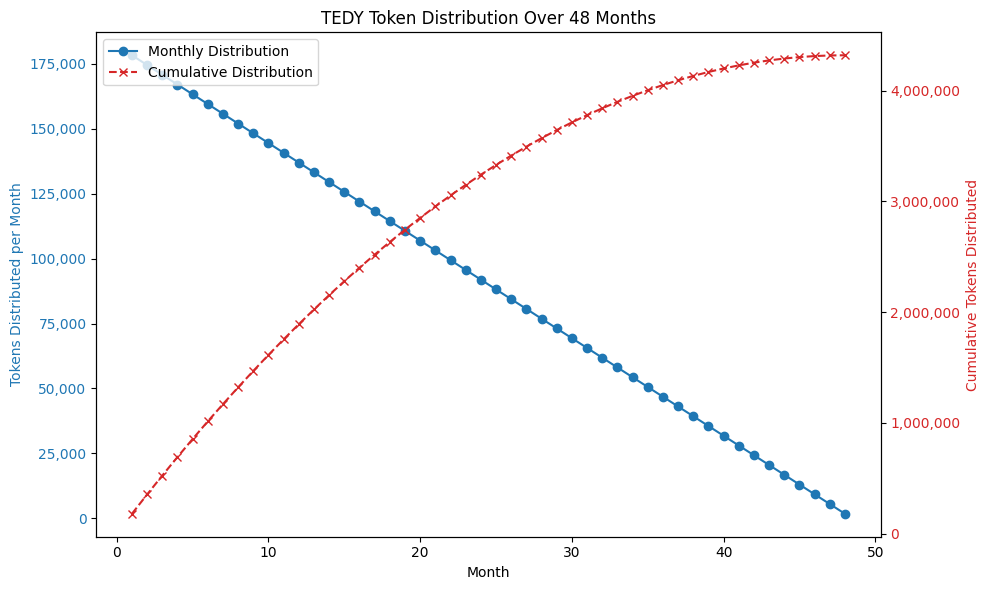

    Month Monthly Distribution Cumulative Distribution
0       1            178217.82                 178,218
1       2            174463.87                 352,682
2       3            170709.92                 523,392
3       4            166955.97                 690,348
4       5            163202.02                 853,550
5       6            159448.07               1,012,998
6       7            155694.12               1,168,692
7       8            151940.17               1,320,632
8       9            148186.22               1,468,818
9      10            144432.27               1,613,250
10     11            140678.32               1,753,929
11     12            136924.37               1,890,853
12     13            133170.42               2,024,024
13     14            129416.47               2,153,440
14     15            125662.52               2,279,103
15     16            121908.57               2,401,011
16     17            118154.62               2,519,166
17     18 

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Helper function to format y-axis ticks (now modified to work with Series.apply())
def plain_format_full(x, pos=None):
    # Use ':,' formatter for thousands separator
    return '{:,.0f}'.format(x)
    
# Constants with updated reward calculation
start_reward = 178217.82
monthly_decrease = -3753.95
total_months = 48

# Calculate rewards
months = np.arange(1, total_months + 1)
monthly_rewards = np.maximum(start_reward + (monthly_decrease * (months - 1)), 0)
cumulative_rewards = np.cumsum(monthly_rewards)

# Create dataframe with updated values
data = {'Month': months,
        'Monthly Distribution': monthly_rewards,
        'Cumulative Distribution': cumulative_rewards}
df = pd.DataFrame(data)

# Setup plot with updated values
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_title('TEDY Token Distribution Over 48 Months')
ax1.set_xlabel('Month')
ax1.set_ylabel('Tokens Distributed per Month', color=color)
line1, = ax1.plot(months, monthly_rewards, label='Monthly Distribution', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(FuncFormatter(plain_format_full))  # Apply plain number formatting for y-axis

# Secondary axis for Cumulative Distribution
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Tokens Distributed', color=color)
line2, = ax2.plot(months, cumulative_rewards, label='Cumulative Distribution', color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(FuncFormatter(plain_format_full))  # Apply plain number formatting for y-axis

# Add legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()

# Apply formatter to the dataframe for display
df_formatted = df.copy()
df_formatted['Monthly Distribution'] = df_formatted['Monthly Distribution'].map('{:.2f}'.format)
# Use the modified plain_format_full function
df_formatted['Cumulative Distribution'] = df_formatted['Cumulative Distribution'].apply(plain_format_full)

# Show the updated plot
plt.show()

# Display updated dataframe
print(df_formatted)

In [15]:
import requests
import pandas as pd
import numpy as np

# Constants for the new reward scheme
start_reward = 178217.82  # Starting monthly reward
monthly_decrease = 3753.95  # Monthly decrease amount
total_months = 48  # Number of months

# Function to calculate monthly rewards for each month
def monthly_reward(month):
    return max(start_reward - (monthly_decrease * (month - 1)), 0)

# Pool distribution ratios
pool_distribution_ratios = {
  # Tier 1
  '1c0ad45d50bd0a8c9bb851a9c59c3cb3e1ab2e2a29bd4d61b0e967ca.TEDY_ADA_POOL_IDENTITY': 0.6, # TEDY/ADA

  # Tier 2 (55% of 40% = 22% of total, divided by 4 pairs)
  '18a44dde2d51a57964fedacc77182c45df88f86512c51e8f7eba0eb6.iBTC_ADA_POOL_IDENTITY': 0.055,# ADA/iBTC
  'ed8cc5ae2e5a68d78ecf333e86c466068242bbab2f8fca983a2f53e1.cBTC_ADA_POOL_IDENTITY': 0.055, # ADA/cBTC
  '44de9976b4ef013ec683d49175f6edae92d1feeb2314fa18f060ea39.iUSD_ADA_POOL_IDENTITY': 0.055, # ADA/iUSD
  '672b7b2e1caa394f16d9efb23fb24b892fa5eab8156679da197d8c1c.CHRY_ADA_POOL_IDENTITY': 0.055, # ADA/CHRY

  # Tier 3 (45% of 40% = 18% of total, divided by 9 pairs)
  '03a666d6ad004932bdd9d7e0d5a374262454cd84602bd494c9cd48d6.DJED_ADA_POOL_IDENTITY': 0.02, # ADA/DJED
  '1f164eea5c242f53cb2df2150fa5ab7ba126350e904ddbcc65226e18.cNETA_ADA_POOL_IDENTITY': 0.02, # ADA/cNETA
  '0cd54b77ac0d70942895c7f1ebc8bdb06ec2fffbe1da6e26209675d2.FACT_ADA_POOL_IDENTITY': 0.02, # ADA/FACT
  'c30d7086eeb68050a5b01efc219c5d4b5d5fd38e2e62fd6d7f01ac4d.AADA_ADA_POOL_IDENTITY': 0.02, # ADA/AADA
  '5d137c35eb5cba295aae2c44e0d9a82ca9f3d362caf3d681ffc9328b.ENCS_ADA_POOL_IDENTITY': 0.02, # ADA/ENCS
  '8d17d7a368cf5d1a3fe4468735050fdb8d2ae2bb2666aca05edd6969.SNEK_ADA_POOL_IDENTITY': 0.02, # ADA/SNEK
  '98de80cd7add6f1b9dacd076de508fc2cfad37d05b4dc6fbb8a510fa.iETH_ADA_POOL_IDENTITY': 0.02, # ADA/iETH
  'ed3ea3cc3efda14d48d969e57ec22e2b3e5803ed4887c1152c48637c.INDY_ADA_POOL_IDENTITY': 0.02, # ADA/INDY
  '3f241feae5f5cea28c3ea3b6746d7cdf76e4bae822c01e0b25ad2e38.OPTIM_ADA_POOL_IDENTITY': 0.02, # ADA/OPTIM
}

# User's LP tokens
user_lp_tokens = 862  # The number of LP tokens held by the user

# The pool ID for which we want to calculate the rewards
pool_id = "1c0ad45d50bd0a8c9bb851a9c59c3cb3e1ab2e2a29bd4d61b0e967ca.TEDY_ADA_POOL_IDENTITY"

# Fetch pools data from the API endpoints
overview_response = requests.get("https://analytics.teddyswap.org/v1/pools/overview?after=0")
pools_response = requests.get("https://analytics.teddyswap.org/v1/front/pools?after=0")

if overview_response.ok and pools_response.ok:
    overview_data = overview_response.json()
    pools_data = pools_response.json()

    # Extract pool and overview data
    pool_data = next((pool for pool in pools_data if pool['id'] == pool_id), None)
    pool_overview = next((overview for overview in overview_data if overview['id'] == pool_id), None)
    
    if pool_data and pool_overview:
        # Extract values from pool data
        locked_x_ada = float(pool_data['lockedX']['amount'])
        locked_y_tedy = float(pool_data['lockedY']['amount'])
        total_lp_tokens = float(pool_data['lockedLQ']['amount'])  # Total LP tokens

        # User's share of the total LP tokens
        user_share = user_lp_tokens / total_lp_tokens

        # Calculate dynamic price of TEDY in ADA
        price_tedy_in_ada = locked_x_ada / locked_y_tedy

        # Calculate the monthly rewards for the first 12 months
        average_month_reward_12_months = np.mean([monthly_reward(m) for m in range(1, 13)])

        # Calculate the annual rewards for the pool and user
        pool_reward_ratio = pool_distribution_ratios[pool_id]  # Get the reward ratio for the specific pool
        pool_annual_rewards_tedy = average_month_reward_12_months * 12 * pool_reward_ratio
        user_annual_rewards_tedy = pool_annual_rewards_tedy * user_share

        # Convert annual rewards from TEDY to ADA
        pool_annual_rewards_ada = pool_annual_rewards_tedy * price_tedy_in_ada
        user_annual_rewards_ada = user_annual_rewards_tedy * price_tedy_in_ada

        # Calculate user's stake in ADA
        user_stake_ada = pool_overview['tvl'] * user_share

        # Calculate APR for the pool and the user
        pool_apr = (pool_annual_rewards_ada / pool_overview['tvl'] * 100)
        user_apr = (user_annual_rewards_ada / user_stake_ada * 100) if user_stake_ada else float('inf')  # To avoid division by zero

        # Create DataFrame for display
        df_stats = pd.DataFrame({
            'Statistic': [
                'User LP Tokens', 'User Share in Pool (%)', 'User Stake Value in ADA',
                'User Annual Rewards in ADA', 'User APR (%)', 'Total Locked LP Tokens',
                'Pool TVL in ADA', 'Pool Annual Rewards in ADA', 'Pool APR (%)',
                'Price of TEDY in ADA'
            ],
            'Value': [
                user_lp_tokens, f"{user_share * 100:.2f}%", f"{user_stake_ada:.2f} ADA",
                f"{user_annual_rewards_ada:.2f} ADA", f"{user_apr:.2f}%",
                f"{total_lp_tokens:.0f}", f"{pool_overview['tvl']:.2f} ADA",
                f"{pool_annual_rewards_ada:.2f} ADA", f"{pool_apr:.2f}%",
                f"{price_tedy_in_ada:.8f} ADA"
            ]
        })

        print(df_stats)
    else:
        print("Pool data not found.")
else:
    print("Failed to retrieve data from the API.")

                    Statistic           Value
0              User LP Tokens             862
1      User Share in Pool (%)           0.11%
2     User Stake Value in ADA      910.49 ADA
3  User Annual Rewards in ADA     1770.61 ADA
4                User APR (%)         194.47%
5      Total Locked LP Tokens          749659
6             Pool TVL in ADA   791829.49 ADA
7  Pool Annual Rewards in ADA  1539856.06 ADA
8                Pool APR (%)         194.47%
9        Price of TEDY in ADA  1.35728509 ADA


In [18]:
# Updated pool distribution ratios
poolDistributionRatios = {
    # Tier 1
    '1c0ad45d50bd0a8c9bb851a9c59c3cb3e1ab2e2a29bd4d61b0e967ca.TEDY_ADA_POOL_IDENTITY': 0.6,  # TEDY/ADA

    # Tier 2 (55% of 40% = 22% of total, divided by 4 pairs)
    '18a44dde2d51a57964fedacc77182c45df88f86512c51e8f7eba0eb6.iBTC_ADA_POOL_IDENTITY': 0.055, # ADA/iBTC
    'ed8cc5ae2e5a68d78ecf333e86c466068242bbab2f8fca983a2f53e1.cBTC_ADA_POOL_IDENTITY': 0.055, # ADA/cBTC
    '44de9976b4ef013ec683d49175f6edae92d1feeb2314fa18f060ea39.iUSD_ADA_POOL_IDENTITY': 0.055, # ADA/iUSD
    '672b7b2e1caa394f16d9efb23fb24b892fa5eab8156679da197d8c1c.CHRY_ADA_POOL_IDENTITY': 0.055, # ADA/CHRY

    # Tier 3 (45% of 40% = 18% of total, divided by 9 pairs)
    '03a666d6ad004932bdd9d7e0d5a374262454cd84602bd494c9cd48d6.DJED_ADA_POOL_IDENTITY': 0.02, # ADA/DJED
    '1f164eea5c242f53cb2df2150fa5ab7ba126350e904ddbcc65226e18.cNETA_ADA_POOL_IDENTITY': 0.02, # ADA/cNETA
    '0cd54b77ac0d70942895c7f1ebc8bdb06ec2fffbe1da6e26209675d2.FACT_ADA_POOL_IDENTITY': 0.02, # ADA/FACT
    'c30d7086eeb68050a5b01efc219c5d4b5d5fd38e2e62fd6d7f01ac4d.AADA_ADA_POOL_IDENTITY': 0.02, # ADA/AADA
    '5d137c35eb5cba295aae2c44e0d9a82ca9f3d362caf3d681ffc9328b.ENCS_ADA_POOL_IDENTITY': 0.02, # ADA/ENCS
    '8d17d7a368cf5d1a3fe4468735050fdb8d2ae2bb2666aca05edd6969.SNEK_ADA_POOL_IDENTITY': 0.02, # ADA/SNEK
    '98de80cd7add6f1b9dacd076de508fc2cfad37d05b4dc6fbb8a510fa.iETH_ADA_POOL_IDENTITY': 0.02, # ADA/iETH
    'ed3ea3cc3efda14d48d969e57ec22e2b3e5803ed4887c1152c48637c.INDY_ADA_POOL_IDENTITY': 0.02, # ADA/INDY
    '3f241feae5f5cea28c3ea3b6746d7cdf76e4bae822c01e0b25ad2e38.OPTIM_ADA_POOL_IDENTITY': 0.02, # ADA/OPTIM
}

# Sum the values to verify if it totals 100%
total_percentage = sum(poolDistributionRatios.values())

# The total rewards for the first month
total_rewards_month_1 = 178218  # Total TEDY rewards for the first month
tier_1_identity = '1c0ad45d50bd0a8c9bb851a9c59c3cb3e1ab2e2a29bd4d61b0e967ca.TEDY_ADA_POOL_IDENTITY'
tier_1_rewards = total_rewards_month_1 * poolDistributionRatios[tier_1_identity]
tier_2_and_3_share = 1 - poolDistributionRatios[tier_1_identity]
tier_2_rewards = total_rewards_month_1 * tier_2_and_3_share * 0.55  # 55% of the 40% share
tier_3_rewards = total_rewards_month_1 * tier_2_and_3_share * 0.45  # 45% of the 40% share

# Calculate rewards per pair in Tier 2 and Tier 3
tier_2_pairs = 4
tier_2_rewards_per_pair = tier_2_rewards / tier_2_pairs

tier_3_pairs = 9
tier_3_rewards_per_pair = tier_3_rewards / tier_3_pairs

# Results
print(f"Total distribution percentage: {total_percentage * 100}%")
print(f"Tier 1 (TEDY/ADA) rewards for month 1: {tier_1_rewards}")
print(f"Tier 2 rewards per pair for month 1: {tier_2_rewards_per_pair}")
print(f"Tier 3 rewards per pair for month 1: {tier_3_rewards_per_pair}")

Total distribution percentage: 100.00000000000003%
Tier 1 (TEDY/ADA) rewards for month 1: 106930.8
Tier 2 rewards per pair for month 1: 9801.99
Tier 3 rewards per pair for month 1: 3564.3599999999997
